## The Secretary Problem

#### Run Experiments

In [1]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
from secretary_experiments import run_experiments
from collections import Counter

In [2]:
run_experiments()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


#### Helper Functions

In [3]:
def count_results(results):
    """Receives results for one experiment and counts: 1) the occurance of candidates from each color, and 2)
    the occurance of candidates that are equal to the max value from that color

    Args:
        results (tuple): the results of the experiment

    Returns:
        Counter: occurances of candidates per color
        Counter: occurances of candidates per color that are the max within their group
    """
    return Counter([item.color for item in results]), Counter([item.color for item in results if item.ismax])

In [4]:
def unfold_synthetic_experiment(results, experiment):
    """Plots the occurance of candidates per color and algorithm within an experiment

    Args:
        results (tuple): the results of the experiment
        experiment (string): name of the experiment
    """
    
    results_SA, results_SCSA, results_MCSA = results
        
    SA = count_results(results_SA)
    SCSA = count_results(results_SCSA)
    MCSA = count_results(results_MCSA)

    print("Percentage of Picked Candidates: ", (20000 - MCSA[0][-1])/(20000 - SCSA[0][-1]))
    print("Percentage of Max Candidates: ", sum(MCSA[1].values())/sum(SCSA[1].values()))
  
    X = ['Input', 'F-Pick', 'F-Max', 'U-Pick','U-Max', 'S-Pick', 'S-Max']

    reds = [10, MCSA[0]['red'], MCSA[1]['red'], SA[0]['red'], SA[1]['red'], SCSA[0]['red'], SCSA[1]['red']]
    greens = [100, MCSA[0]['green'], MCSA[1]['green'], SA[0]['green'], SA[1]['green'], SCSA[0]['green'], SCSA[1]['green']]
    blues = [1000, MCSA[0]['blue'], MCSA[1]['blue'], SA[0]['blue'], SA[1]['blue'], SCSA[0]['blue'], SCSA[1]['blue']]
    yellows = [10000, MCSA[0]['yellow'], MCSA[1]['yellow'], SA[0]['yellow'], SA[1]['yellow'], SCSA[0]['yellow'], SCSA[1]['yellow']]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.4, reds, 0.2, label = 'Color1', color='#b2b2ff', edgecolor = '#b2b2ff')
    plt.bar(X_axis - 0.2, greens, 0.2, label = 'Color2', color='#ffb2b2', edgecolor = '#ffb2b2')
    plt.bar(X_axis + 0, blues, 0.2, label = 'Color3', color='#ecd9c6', edgecolor = '#ecd9c6')
    plt.bar(X_axis + 0.2, yellows, 0.2, label = 'Color4', color='#808080', edgecolor = '#808080')

    plt.xticks(X_axis, X)
    plt.ylabel("Number of Occurances")
    plt.title(experiment)
    plt.legend()
    plt.ylim(top = 12000)
    plt.show()

In [5]:
def unfold_real_experiment(results, n, colors, experiment, top_limit = 18000):
    """Plots the occurance of candidates per color and algorithm within an experiment

    Args:
        results (tuple): the results of the experiment
        n (list): size of groups
        colors (list): name of groups
        experiment (string): name of the experiment
        top_limit (int):top limit of the plot y-axis
    """
    
    results_SA, results_SCSA, results_MCSA = results
        
    SA = count_results(results_SA)
    SCSA = count_results(results_SCSA)
    MCSA = count_results(results_MCSA)

    print("Percentage of Picked Candidates: ", (20000 - MCSA[0][-1])/(20000 - SCSA[0][-1]))
    print("Percentage of Max Candidates: ", sum(MCSA[1].values())/sum(SCSA[1].values()))
  
    X = ['Input', 'F-Pick', 'F-Max', 'U-Pick','U-Max', 'S-Pick', 'S-Max']

    color1 = [n[0], MCSA[0][colors[0]], MCSA[1][colors[0]], SA[0][colors[0]], SA[1][colors[0]], SCSA[0][colors[0]], SCSA[1][colors[0]]]
    color2 = [n[1], MCSA[0][colors[1]], MCSA[1][colors[1]], SA[0][colors[1]], SA[1][colors[1]], SCSA[0][colors[1]], SCSA[1][colors[1]]]
    color3 = [n[2], MCSA[0][colors[2]], MCSA[1][colors[2]], SA[0][colors[2]], SA[1][colors[2]], SCSA[0][colors[2]], SCSA[1][colors[2]]]
    color4 = [n[3], MCSA[0][colors[3]], MCSA[1][colors[3]], SA[0][colors[3]], SA[1][colors[3]], SCSA[0][colors[3]], SCSA[1][colors[3]]]
    color5 = [n[4], MCSA[0][colors[4]], MCSA[1][colors[4]], SA[0][colors[4]], SA[1][colors[4]], SCSA[0][colors[4]], SCSA[1][colors[4]]]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.3, color1, 0.15, label = colors[0], color='#b2b2ff', edgecolor = '#b2b2ff')
    plt.bar(X_axis - 0.15, color2, 0.15, label = colors[1], color='#ffb2b2', edgecolor = '#ffb2b2')
    plt.bar(X_axis + 0, color3, 0.15, label = colors[2], color='#ecd9c6', edgecolor = '#ecd9c6')
    plt.bar(X_axis + 0.15, color4, 0.15, label = colors[3], color='#808080', edgecolor = '#808080')
    plt.bar(X_axis + 0.3, color5, 0.15, label = colors[4], color='purple', edgecolor = 'purple')

    plt.xticks(X_axis, X)
    plt.ylabel("Number of Occurances")
    plt.title(experiment)
    plt.legend()
    plt.ylim(top = top_limit)
    plt.show()

#### 1,2) Synthetic Experiments

In [8]:
with open('results/results_synthetic1.pickle', 'rb') as f:
     results = pickle.load(f)
        
with open('results/results_synthetic2.pickle', 'rb') as f:
     results2 = pickle.load(f)

Percentage of Picked Candidates:  1.3472904420645784
Percentage of Max Candidates:  1.6532204734823437


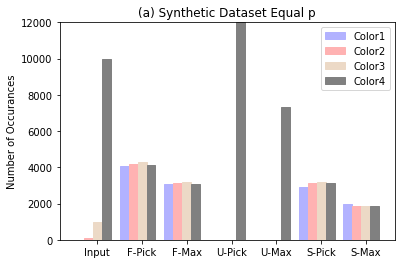

Percentage of Picked Candidates:  1.339409025212783
Percentage of Max Candidates:  1.622236842105263


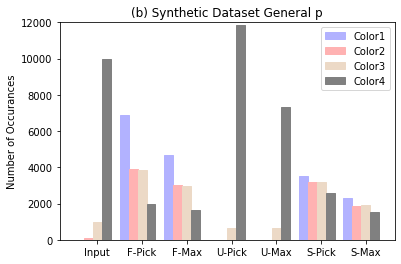

In [9]:
unfold_synthetic_experiment(results, experiment = "(a) Synthetic Dataset Equal p")
unfold_synthetic_experiment(results2, experiment = "(b) Synthetic Dataset General p")

#### 3) Bank Data Experiment

In [12]:
with open('results/results_bank.pickle', 'rb') as f:
     results3 = pickle.load(f)
        
with open('results/results_bank_args.pickle', 'rb') as f:
     n_bank = pickle.load(f)
        
colors = ['under 30', '31-40', '41-50', '51-60', 'over 60']

Percentage of Picked Candidates:  1.376056787366406
Percentage of Max Candidates:  1.8294093349855431


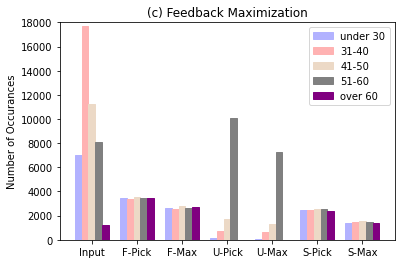

In [13]:
unfold_real_experiment(results3, n_bank, colors, experiment = "(c) Feedback Maximization")

#### 4) Pokec Data Experiment

In [15]:
with open('results/results_pokec_part1.pickle', 'rb') as f:
     results4_part1 = pickle.load(f)
        
with open('results/results_pokec_args_part1.pickle', 'rb') as f:
     n_pokec_part1 = pickle.load(f)
        
with open('results/results_pokec_part2.pickle', 'rb') as f:
     results4_part2 = pickle.load(f)
        
with open('results/results_pokec_args_part2.pickle', 'rb') as f:
     n_pokec_part2 = pickle.load(f)

colors = ["Under", "Normal", "Over", "Obese 1", "Obese 2"]

In [16]:
results4 = tuple(x + y for x, y in zip(results4_part1, results4_part2))
n_pokec = [int(number * 3500 / 200000) for number in n_pokec_part1]

Percentage of Picked Candidates:  1.3699517900893068
Percentage of Max Candidates:  1.811086897303187


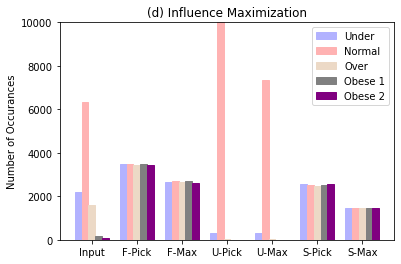

In [17]:
unfold_real_experiment(results4, n_pokec, colors, experiment = "(d) Influence Maximization", top_limit = 10000)